# Racial Segregation in US Cities Report

In [1]:
# Projet Setup 
import pandas as pd

In [2]:
# import the chicago data
chicago_df=pd.read_csv("data/prepped/chicago_race.csv")
chicago_df.head(5)

,GEOID,GEO.display.label,pop,pop.white,pop.not.white,pct.white,pct.not.white
0,17031010201,17031010201,6450,2312,4138,0.358450,0.641550
1,17031010202,17031010202,2818,1237,1581,0.438964,0.561036
2,17031010300,17031010300,6236,3267,2969,0.523894,0.476106
3,17031010400,17031010400,5042,3341,1701,0.662634,0.337366
4,17031010503,17031010503,2290,1452,838,0.634061,0.365939


# Diversity Ratio

In [3]:
total_white_people=chicago_df["pop.white"].sum()
print("There are",total_white_people,"white people")

total_not_white_people=chicago_df["pop.not.white"].sum()
print("There are",total_not_white_people,"non white people")

diversity_ratio=total_white_people/total_not_white_people
print("The diversity ratio is",diversity_ratio)

There are 2513996 white people
There are 2134618 non white people
The diversity ratio is 1.1777264128757463


# Measuring Chicago's Interaction Index

In [4]:
# Calculating the total minority population
total_minority_pop=chicago_df["pop.not.white"].sum()
#Calculating the interaction index for each sub neighbourhood/sub tract
chicago_df["interaction_index"]=(chicago_df["pop.not.white"]/total_minority_pop)*(chicago_df["pop.white"]/chicago_df["pop"])
                                                                                            
chicago_df.head(5)

,GEOID,GEO.display.label,pop,pop.white,pop.not.white,pct.white,pct.not.white,interaction_index
0,17031010201,17031010201,6450,2312,4138,0.358450,0.641550,0.000695
1,17031010202,17031010202,2818,1237,1581,0.438964,0.561036,0.000325
2,17031010300,17031010300,6236,3267,2969,0.523894,0.476106,0.000729
3,17031010400,17031010400,5042,3341,1701,0.662634,0.337366,0.000528
4,17031010503,17031010503,2290,1452,838,0.634061,0.365939,0.000249


In [5]:
#Calculating the interaction index for chicago(sum of the interaction index column)
interaction_index_of_chicago=chicago_df["interaction_index"].sum()
interaction_index_of_chicago

0.33621530101878605

# Calculate the interaction index for all US Cities

In [6]:
import os

In [7]:
city_file_name_list=os.listdir("data/prepped/")
city_file_name_list

['ok_city_race.csv',
 'denver_race.csv',
 'pittsburgh_race.csv',
 'syracuse_race.csv',
 'columbus_race.csv',
 'kc_race.csv',
 'milwaukee_race.csv',
 'wichita_race.csv',
 'memphis_race.csv',
 'st_louis_race.csv',
 'baltimore_race.csv',
 'charleston_race.csv',
 'dayton_race.csv',
 'chicago_race.csv']

In [8]:
def print_interaction_indexes():
    #Getting a list of all the city file names
    city_file_name_list=os.listdir("data/prepped/")
    #For Loop
    # For each city file
    for city_file_name in city_file_name_list:
        #Import the city data
        city_df=pd.read_csv("data/prepped/"+city_file_name)
        # Calculating the total minority population
        total_minority_pop=chicago_df["pop.not.white"].sum()
        #Calculating the interaction index for each sub neighbourhood/sub tract
        city_df["interaction_index"]=(city_df["pop.not.white"]/total_minority_pop)*(city_df["pop.white"]/city_df["pop"])
        #Calculating the interaction index for chicago(sum of the interaction index column)
        interaction_index_of_chicago=city_df["interaction_index"].sum()
        #Print out the interaction index for the city
        #Bonus(5 points):Get rid of _race.csv and make the first letter capital
        # Hint: use string functions
        
        print(city_file_name.replace("race.csv","").title(),": ",interaction_index_of_chicago)
            
        
    

In [9]:
print_interaction_indexes()

Ok_City_ :  0.10122606385428407
Denver_ :  0.19558281757835597
Pittsburgh_ :  0.07504269251620427
Syracuse_ :  0.028713502037955446
Columbus_ :  0.09748767915394775
Kc_ :  0.12589072014503302
Milwaukee_ :  0.08438208030916368
Wichita_ :  0.03667580609138098
Memphis_ :  0.29170054708115506
St_Louis_ :  0.12920314966767957
Baltimore_ :  0.013359092544132627
Charleston_ :  0.37206746817570885
Dayton_ :  0.04202063985716865
Chicago_ :  0.33621530101878605


# Calculating the isolation index for all cities

In [21]:
def print_isolation_indexes():
    #Getting a list of all the city file names
    city_file_name_list=os.listdir("data/prepped/")
    #For Loop
    # For each city file
    for city_file_name in city_file_name_list:
        #Import the city data
        city_df=pd.read_csv("data/prepped/"+city_file_name)
        # Calculating the total minority population
        total_minority_pop=chicago_df["pop.not.white"].sum()
        #Calculating the isolation index for each sub neighbourhood/sub tract
        city_df["isolation_index"]=(city_df["pop.not.white"]/total_minority_pop)*(city_df["pop.not.white"]/city_df["pop"])
        #Calculating the isolation index for city(sum of the interaction index column)
        isolation_index_of_city=city_df["isolation_index"].sum()
        #Print out the interaction index for the city
        #Bonus(5 points):Get rid of _race.csv and make the first letter capital
        # Hint: use string functions
        
        print(city_file_name.replace("race.csv","").title(),": ",isolation_index_of_city)

In [22]:
print_isolation_indexes()

Ok_City_ :  0.06377910334659216
Denver_ :  0.08982281471744592
Pittsburgh_ :  0.04941329914131947
Syracuse_ :  0.01865516064548487
Columbus_ :  0.08404456689663366
Kc_ :  0.09091200521378998
Milwaukee_ :  0.12435971798917353
Wichita_ :  0.020669348873113842
Memphis_ :  0.31449925072810175
St_Louis_ :  0.17809211346605208
Baltimore_ :  0.04817697620446782
Charleston_ :  0.34606289519609823
Dayton_ :  0.04081619558598793
Chicago_ :  0.663784698981214


# Create a function that returns the metrics for each city

In [25]:
def get_interaction_index(city_df):
    # Calculating the total minority population
        total_minority_pop=city_df["pop.not.white"].sum()
        #Calculating the interaction index for each sub neighbourhood/sub tract
        city_df["interaction_index"]=(city_df["pop.not.white"]/total_minority_pop)*(city_df["pop.white"]/city_df["pop"])
        #Calculating the interaction index for city(sum of the interaction index column)
        interaction_index_of_city=city_df["interaction_index"].sum()
        return interaction_index_of_city   
        
    

In [26]:
def get_isolation_index(city_df):
    # Calculating the total minority population
        total_minority_pop=city_df["pop.not.white"].sum()
    #Calculating the isolation index for each sub neighbourhood/sub tract
        city_df["isolation_index"]=(city_df["pop.not.white"]/total_minority_pop)*(city_df["pop.not.white"]/city_df["pop"])
    #Calculating the isolation index for city(sum of the interaction index column)
        isolation_index_of_city=city_df["isolation_index"].sum()
        return isolation_index_of_city
    

In [30]:
def get_diversity_ratio(city_df):
    total_white_people=city_df["pop.white"].sum()
    total_not_white_people=city_df["pop.not.white"].sum()
    diversity_ratio=total_white_people/total_not_white_people
    return diversity_ratio

In [33]:
def get_metrics_df():
    #Getting a list of all the city file names
    city_file_name_list=os.listdir("data/prepped/")
    # Making an empty dataframe
    metrics_df=pd.DataFrame(columns=["city","interaction_index","isolation_index","diversity_ratio"])
    #For Loop
    # For each city file
    for city_file_name in city_file_name_list:
        #Import the city data
        city_df=pd.read_csv("data/prepped/"+city_file_name)

        
        #New row
        new_row={"city": city_file_name.replace("_race.csv","").title(),
                "interaction_index":get_interaction_index(city_df),
                "isolation_index":get_isolation_index(city_df),
                "diversity_ratio":get_diversity_ratio(city_df)}
        #Add this new row to metrics DF
        metrics_df=metrics_df.append(new_row,ignore_index=True)
        
    return metrics_df.sort_values(["diversity_ratio"],ascending=True)
                                        

In [34]:
get_metrics_df()

,city,interaction_index,isolation_index,diversity_ratio
10,Baltimore,0.217094,0.782906,0.634657
13,Chicago,0.336215,0.663785,1.177726
11,Charleston,0.518106,0.481894,2.051064
4,Columbus,0.537027,0.462973,2.504501
0,Ok_City,0.613472,0.386528,2.534255
6,Milwaukee,0.404241,0.595759,2.770268
9,St_Louis,0.420453,0.579547,3.155248
7,Wichita,0.639562,0.360438,3.729074
1,Denver,0.685280,0.314720,3.744329
8,Memphis,0.481195,0.518805,3.794997


<AxesSubplot:xlabel='diversity_ratio', ylabel='interaction_index'>

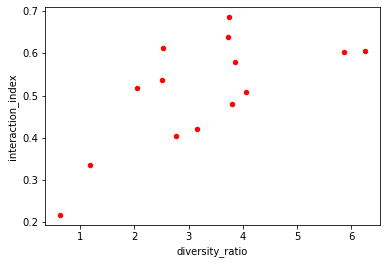

In [37]:
#Investigating the relationship between the diversity ratio and the interaction index
metrics_df=get_metrics_df()
metrics_df.plot.scatter(x="diversity_ratio",y="interaction_index",c="Red")

In [40]:
metrics_df.to_csv("us_segregation_metrics.csv")